# Dataset

eLife and PLOS as introduced by Goldsack et al in [Making Science Simple: Corpora for the Lay Summarisation of Scientific Literature](https://aclanthology.org/2022.emnlp-main.724/)

In [55]:
import pandas as pd
from transformers import AutoTokenizer
import numpy as np
import matplotlib.pyplot as plt

## Dataset selection
Uncomment either path to analyse the dataset.

In [7]:
path = "../data/task1_development/train/eLife_train.jsonl" # eLife
#path = "../data/task1_development/train/PLOS_train.jsonl" # PLOS

## Dataset statisticts and visualisaition

In [8]:
df = pd.read_json(path, lines=True)

In [9]:
df.head()

,lay_summary,article,headings,keywords,id
0,"In the USA , more deaths happen in the winter ...","In temperate climates , winter deaths exceed s...","[Abstract, Introduction, Results, Discussion, ...",[epidemiology and global health],elife-35500-v1
1,Most people have likely experienced the discom...,Whether complement dysregulation directly cont...,"[Abstract, Introduction, Results, Discussion, ...","[microbiology and infectious disease, immunolo...",elife-48378-v2
2,The immune system protects an individual from ...,Variation in the presentation of hereditary im...,"[Abstract, Introduction, Results, Discussion, ...","[microbiology and infectious disease, immunolo...",elife-04494-v1
3,The brain adapts to control our behavior in di...,Rapid and flexible interpretation of conflicti...,"[Abstract, Introduction, Results, Discussion, ...",[neuroscience],elife-12352-v2
4,Cells use motor proteins that to move organell...,Myosin 5a is a dual-headed molecular motor tha...,"[Abstract, Introduction, Results, Discussion, ...",[structural biology and molecular biophysics],elife-05413-v2


### Categories

In [10]:
df.keywords.explode().value_counts()

neuroscience                                   1240
cell biology                                    922
developmental biology                           553
biochemistry and chemical biology               505
structural biology and molecular biophysics     480
microbiology and infectious disease             420
chromosomes and gene expression                 353
computational and systems biology               298
genetics and genomics                           261
evolutionary biology                            253
immunology and inflammation                     243
short report                                    227
cancer biology                                  207
tools and resources                             205
plant biology                                   158
ecology                                         154
stem cells and regenerative medicine            131
epidemiology and global health                  104
medicine                                         96
physics of l

### Token lengths

Article token lengths

In [34]:
tokenizer = AutoTokenizer.from_pretrained("microsoft/biogpt")

In [58]:
def token_lengths(texts):
    tokens = tokenizer(texts)
    return list(map(lambda x: len(x), tokens['input_ids']))

In [61]:
art_lens = token_lengths(df.sample(n = 100).article.to_list())

In [63]:
f"Sample average token length of articles for BioGPT tokenizer: {np.average(art_lens)}"

'Sample average token length of articles for BioGPT tokenizer: 13234.5'

(array([ 5., 17., 28., 22., 10., 11.,  5.,  0.,  0.,  2.]),
 array([ 2792. ,  5595.1,  8398.2, 11201.3, 14004.4, 16807.5, 19610.6,
        22413.7, 25216.8, 28019.9, 30823. ]),
 <BarContainer object of 10 artists>)

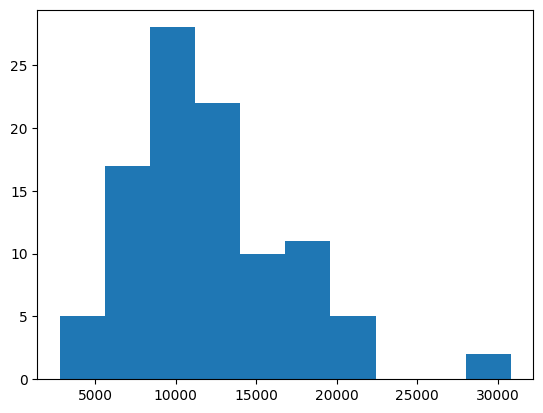

In [59]:
plt.hist(art_lens)

Lay Summary token lengths

(array([ 2.,  3.,  5., 12., 13., 17., 20.,  7., 12.,  9.]),
 array([231. , 263.6, 296.2, 328.8, 361.4, 394. , 426.6, 459.2, 491.8,
        524.4, 557. ]),
 <BarContainer object of 10 artists>)

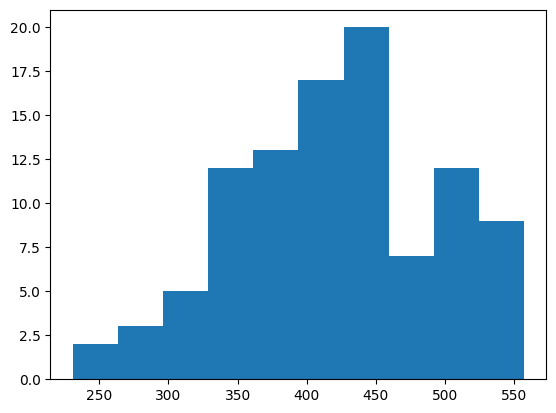

In [60]:
sum_lens = token_lengths(df.sample(n = 100).lay_summary.to_list())
plt.hist(sum_lens)